In [ ]:
from google.colab import files

uploaded = files.upload()

Saving anime.csv to anime.csv


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Preprocessing:**


In [68]:
# Loading the dataset and checking the size

df= pd.read_csv("anime.csv")
df.shape

(12294, 7)

In [69]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [70]:
# Checking for missing values

df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Since, there are few missing values so we can just drop them as the dataset is large.

In [71]:
# Dropping the missing values

df.dropna(inplace=True)

In [72]:
# Checking for the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [73]:
# Basic statistics

df.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [74]:
# Unique values and their counts in categorical columns

df['genre'].value_counts()

genre
Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: count, Length: 3229, dtype: int64

In [75]:
# Unique values and their counts in categorical columns

df["type"].value_counts()

type
TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
Name: count, dtype: int64

In [76]:
# Unique values and their counts

df["rating"].value_counts()

rating
6.00    141
7.00     98
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

<Axes: >

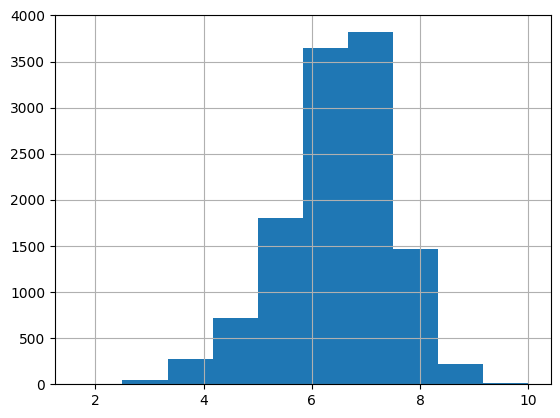

In [77]:
# Histogram to visualize the distribution of ratings

df["rating"].hist()

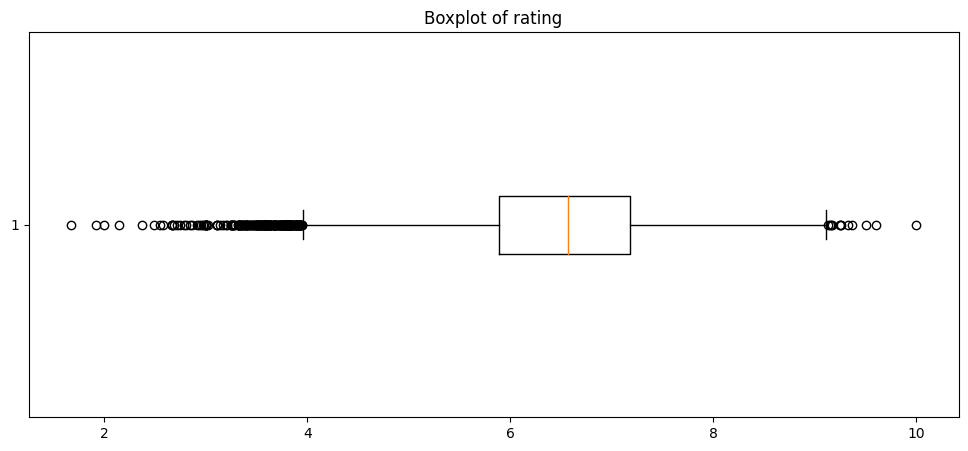

In [78]:
# Boxplot to visualize outliers in rating

plt.figure(figsize=(12,5))
plt.boxplot(df["rating"], vert=False)
plt.title("Boxplot of rating")
plt.show()

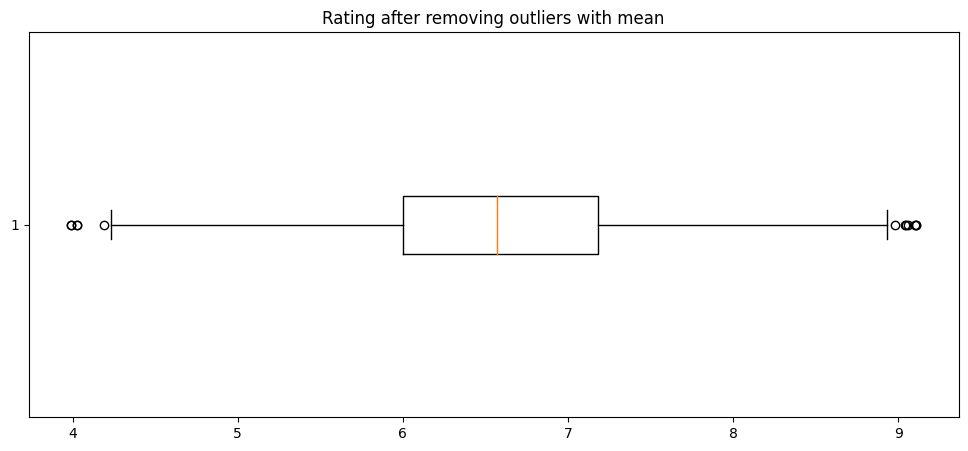

In [79]:
# Mean imputation to remove outlier

df1= df.copy()

for i in df1["rating"]:
    q1= np.quantile(df1["rating"], 0.25)
    q3= np.quantile(df1["rating"], 0.75)
    mean= np.mean(df1["rating"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df1["rating"]= df1["rating"].replace(i, mean)
plt.figure(figsize=(12, 5))
plt.boxplot(df1["rating"], vert=False)
plt.title("Rating after removing outliers with mean")
plt.show()

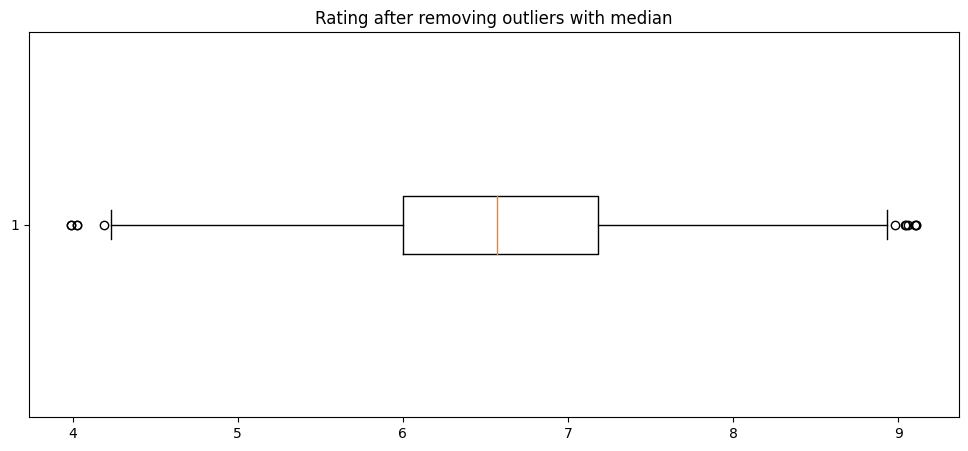

In [80]:
# Median imputation to remove outlier

df2= df.copy()

for i in df2["rating"]:
    q1= np.quantile(df2["rating"], 0.25)
    q3= np.quantile(df2["rating"], 0.75)
    med= np.median(df2["rating"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df2["rating"]= df2["rating"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df2["rating"], vert=False)
plt.title("Rating after removing outliers with median")
plt.show()

Therefore, both mean and median results are similer.

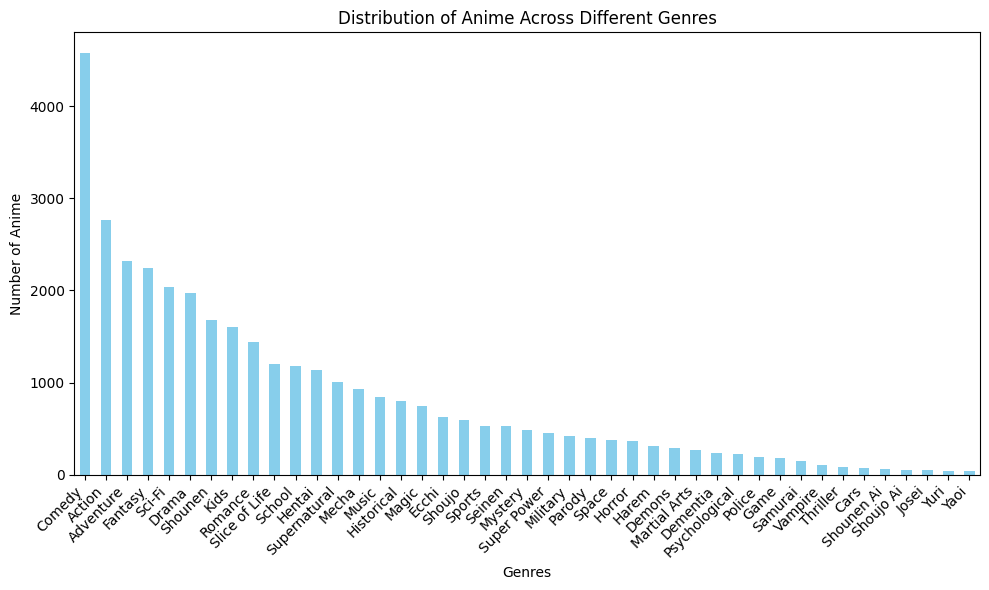

In [81]:
# bar plot to visualize the distribution of anime across different genres

#Split the genre column into multiple genres
genre_lists = df['genre'].str.split(', ')

# Flatten the list of lists
all_genres = [genre for sublist in genre_lists for genre in sublist]

# Create a Series to count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Anime Across Different Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# **2. Feature Extraction:**


In [82]:
# There is a unknown value in episodes so will just drop the that row

unique_episodes = df['episodes'].unique()
print(unique_episodes)

['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '104' '113' '54' '167' '161' '42' '142'
 '31' '373' '220' '46' '195' '17' '1787' '73' '147' '127' '16' '19' '98'
 '150' '76' '53' '124' '29' '115' '224' '44' '58' '93' '154' '92' '67'
 '172' '86' '30' '276' '59' '72' '330' '41' '105' '128' '137' '56' '55'
 '65' '243' '193' '18' '191' '180' '91' '192' '66' '182' '32' '164' '100'
 '296' '694' '95' '68' '117' '151' '130' '87' '170' '119' '84' '108' '156'
 '140' '331' '305' '300' '510' '200' '88' '1471' '526' '143' '726' '136'
 '1818' '237' '1428' '365' '163' '283' '71' '260' '199' '225' '312' '240'
 '1306' '1565' '773' '1274' '90' '475' '263' '8

In [83]:
# Drop rows where 'episodes' is 'Unknown'
df = df[df['episodes'] != 'Unknown']

In [84]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [85]:
# Top anime based on rating

df1.sort_values(by='rating', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
14,28891,Haikyuu!! Second Season,"Comedy, Drama, School, Shounen, Sports",TV,25,8.93,179342
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
16,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397


In [89]:
# One-Hot encoding

genre_dummies = df1['genre'].str.get_dummies(sep=', ')
df_genre = pd.concat([df1['name'], genre_dummies], axis=1)

df_genre= pd.DataFrame(df_genre)
df_genre

,name,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Kimi no Na wa.,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Gintama&#039;,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,Under World,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,Violence Gekiga David no Hoshi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Recommendation System:

In [90]:
# Design a function to recommend anime based on cosine similarity.

from sklearn.metrics.pairwise import cosine_similarity

# Define a function to recommend similar anime based on cosine similarity scores
def recommend_similar_anime(target_anime, df, threshold=0.1):
    numerical_features_df = df.select_dtypes(include=['int', 'float'])  # Select numerical features only
    target_row = df[df["name"] == target_anime].index
    if len(target_row) == 0:
        return []  # Return empty list if target anime not found
    target_row = target_row[0]  # Take the first index if multiple indices are found

    # Compute cosine similarity between the target anime and all other anime
    similarity_scores = cosine_similarity(numerical_features_df.iloc[target_row].values.reshape(1, -1), numerical_features_df)[0]

    # Filter anime based on similarity threshold
    similar_anime_indices = [i for i, sim_score in enumerate(similarity_scores) if sim_score >= threshold]
    similar_anime_names = df.iloc[similar_anime_indices]["name"].tolist()
    return similar_anime_names

target_anime = "Kimi no Na wa."
recommendations = recommend_similar_anime(target_anime, df, threshold=0.1)
print("Recommendations for {}:".format(target_anime))
for anime in recommendations:
    print(anime)

Streaming output truncated to the last 5000 lines.
Super Milk-chan
Super Speed
Suteneko Tora-chan
Tie Shan Gongzhu
Top wo Nerae! Gunbuster Specials
Wizardry
_Summer
Ali Baba to 40-hiki no Touzoku
Aoi Umi no Tristia
Bihada Ichizoku
Hakimono to Kasa no Monogatari
Inuki Kanako Zekkyou Collection: Gakkou ga Kowai!
Loups=Garous Pilot
Princess Lover!: Magical Knight Maria-chan
Sekiei Ayakashi Mangatan
Sugar*Soldier
Aura Battler Dunbine OVA
Chaos Dragon: Sekiryuu Seneki
Cheating Craft
Chou Kousoku Gran Doll
Egao no Hana
Gundam: G no Reconguista
Kojiki: Hyuuga-hen
Mahou Yuugi 3D
Mikan-Seijin
Mobile Suit Gundam: Zeonic Front - Indignation of Zeon.
School Days: Magical Heart Kokoro-chan
Seihou Tenshi Angel Links Special
Sekai de Ichiban Tsuyoku Naritai! Specials
Studio Khara vs. CyberConnect2 Gachinko! Animation Taiketsu!
Superflat First Love
Yugami-kun ni wa Tomodachi ga Inai
Blame! Prologue
Chikotan
Futari wa Milky Holmes
Growlanser IV: Wayfarer of the Time
High Score
Irodorimidori: Change Our

In [91]:
# Split the dataset into training and testing sets.
# Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
# Using PCA to impove models efficiency
# Also, used the dataset with One-Hot encoding to improve models performance

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


# Step 1: Split the dataset into training and testing sets
train_df, test_df = train_test_split(df_genre, test_size=0.3, random_state=42)

# Step 2: Apply PCA to reduce the dimensionality of the feature space
# Determine the maximum number of components based on the number of features
n_components = min(train_df.shape[0], train_df.shape[1]) - 1
pca = PCA(n_components=n_components)
train_features_pca = pca.fit_transform(train_df.iloc[:, 1:])
test_features_pca = pca.transform(test_df.iloc[:, 1:])

# Step 3: Compute item-item similarity using cosine similarity
similarity_matrix = cosine_similarity(train_features_pca, train_features_pca)

# Step 4: Define a function to recommend similar anime based on cosine similarity scores
def recommend_similar_anime(target_anime, similarity_matrix, threshold=0.9):
    target_index = train_df[train_df["name"] == target_anime].index
    if len(target_index) == 0:
        return []  # Return empty list if target anime not found
    target_index = target_index[0]  # Take the first index if multiple indices are found
    similar_anime_indices = [i for i, sim_score in enumerate(similarity_matrix[target_index]) if sim_score >= threshold]
    similar_anime_names = train_df.iloc[similar_anime_indices]["name"].tolist()
    return similar_anime_names

# Step 5: Define a function to evaluate the recommendation system for a given threshold
def evaluate_recommendation_system(test_df, similarity_matrix, threshold=0.9):
    true_positives = 0
    total_recommended = 0
    total_relevant = 0

    for index, row in test_df.iterrows():
        target_anime = row["name"]
        recommended_anime = set(recommend_similar_anime(target_anime, similarity_matrix, threshold))
        relevant_anime = set(test_df[test_df["name"] == target_anime]["name"])

        true_positives += len(recommended_anime.intersection(relevant_anime))
        total_recommended += len(recommended_anime)
        total_relevant += len(relevant_anime)

    # Calculate precision, recall, and F1-score
    precision = true_positives / total_recommended if total_recommended > 0 else 0
    recall = true_positives / total_relevant if total_relevant > 0 else 0
    f1_score_val = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score_val

# Step 6: Evaluate the recommendation system using different threshold values
threshold_values = [0.9]

print("Evaluation Results:")
print("{:<10} {:<10} {:<10} {:<10}".format("Threshold", "Precision", "Recall", "F1-Score"))
for threshold in threshold_values:
    precision, recall, f1_score_val = evaluate_recommendation_system(test_df, similarity_matrix, threshold)
    print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f}".format(threshold, precision, recall, f1_score_val))


Evaluation Results:
Threshold  Precision  Recall     F1-Score  
0.9        0.00       0.00       0.00      


In [92]:
# Verifying the model with different threshold values

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


# Step 1: Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Exclude non-numeric columns
numerical_columns = train_df.select_dtypes(include=['int', 'float']).columns
train_features = train_df[numerical_columns]
test_features = test_df[numerical_columns]

# Step 3: Apply PCA to reduce the dimensionality of the feature space
# Determine the maximum number of components based on the number of features
n_components = min(train_features.shape[0], train_features.shape[1]) - 1
pca = PCA(n_components=n_components)
train_features_pca = pca.fit_transform(train_features)
test_features_pca = pca.transform(test_features)

# Step 4: Compute item-item similarity using cosine similarity
similarity_matrix = cosine_similarity(train_features_pca, train_features_pca)

# Step 5: Define a function to recommend similar anime based on cosine similarity scores
def recommend_similar_anime(target_anime, similarity_matrix, threshold=0.5):
    target_index = train_df[train_df["name"] == target_anime].index
    if len(target_index) == 0:
        return []  # Return empty list if target anime not found
    target_index = target_index[0]  # Take the first index if multiple indices are found
    similar_anime_indices = [i for i, sim_score in enumerate(similarity_matrix[target_index]) if sim_score >= threshold]
    similar_anime_names = train_df.iloc[similar_anime_indices]["name"].tolist()
    return similar_anime_names

# Step 6: Define a function to evaluate the recommendation system for a given threshold
def evaluate_recommendation_system(test_df, similarity_matrix, threshold=0.5):
    true_positives = 0
    total_recommended = 0
    total_relevant = 0

    for index, row in test_df.iterrows():
        target_anime = row["name"]
        recommended_anime = set(recommend_similar_anime(target_anime, similarity_matrix, threshold))
        relevant_anime = set(test_df[test_df["name"] == target_anime]["name"])

        true_positives += len(recommended_anime.intersection(relevant_anime))
        total_recommended += len(recommended_anime)
        total_relevant += len(relevant_anime)

    # Calculate precision, recall, and F1-score
    precision = true_positives / total_recommended if total_recommended > 0 else 0
    recall = true_positives / total_relevant if total_relevant > 0 else 0
    f1_score_val = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score_val

# Step 7: Evaluate the recommendation system using different threshold values
threshold_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print("Evaluation Results:")
print("{:<10} {:<10} {:<10} {:<10}".format("Threshold", "Precision", "Recall", "F1-Score"))
for threshold in threshold_values:
    precision, recall, f1_score_val = evaluate_recommendation_system(test_df, similarity_matrix, threshold)
    print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f}".format(threshold, precision, recall, f1_score_val))


Evaluation Results:
Threshold  Precision  Recall     F1-Score  
0.1        0.00       0.00       0.00      
0.2        0.00       0.00       0.00      
0.3        0.00       0.00       0.00      
0.4        0.00       0.00       0.00      
0.5        0.00       0.00       0.00      
0.6        0.00       0.00       0.00      
0.7        0.00       0.00       0.00      
0.8        0.00       0.00       0.00      
0.9        0.00       0.00       0.00      


Therefore, tried to improve the performance of the model by applying One-Hot encoding and using PCA to reduce the dimensionality and tried with different threshold values but still there is no difference.


# **1. Can you explain the difference between user-based and item-based collaborative filtering?**

**> User-based Collaborative Filtering:**

In user-based collaborative filtering, recommendations are made based on the similarity between users' preferences or behaviors.
It identifies users who have similar preferences to the target user and recommends items that those similar users have liked or interacted with.
To compute similarity between users, various distance metrics (e.g., cosine similarity, Pearson correlation) are used based on their ratings or interactions with items.

Example: If User A and User B have rated similar movies highly, and User A has rated a movie highly that User B hasn't seen yet, the system might recommend that movie to User B because of their similarity.

**>Item-based Collaborative Filtering:**

In item-based collaborative filtering, recommendations are made based on the similarity between items.
It identifies items that are similar to the items the user has already interacted with or liked and recommends those similar items.
To compute similarity between items, similar metrics as user-based collaborative filtering can be used, but here the focus is on items instead of users.

Example: If User A liked Movie 1 and Movie 2 is similar to Movie 1, the system might recommend Movie 2 to User A.

**Difference:**
User-based collaborative filtering focuses on finding similar users to the target user, whereas item-based collaborative filtering focuses on finding similar items to the items the target user has interacted with.
User-based collaborative filtering works well when the user-item matrix is sparse, and there are enough user-item interactions, while item-based collaborative filtering can handle better when the number of users is significantly larger than the number of items.


# **2. What is collaborative filtering, and how does it work?**

Collaborative filtering is a type of recommendation system that predicts users' preferences for items by leveraging the preferences or behaviors of similar users or items.
It works on the assumption that users who have agreed in the past tend to agree again in the future, and items that are similar to each other tend to be liked by similar users.
Collaborative filtering can be divided into two main approaches: memory-based (neighborhood-based) and model-based methods.
Memory-based methods, such as user-based and item-based collaborative filtering, use the entire user-item dataset to generate recommendations. These methods compute similarities between users or items and make predictions based on those similarities.
Model-based methods, such as matrix factorization and deep learning models, learn patterns and relationships from the user-item interactions to make predictions. These methods typically involve training a model on historical user-item interactions and using the learned model to make recommendations for new users or items.